## HW07-Ising Model
## Paimah Safarian 96109628


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import random

Functon defination:

In [ ]:
def initiate(l):
    grid = np.random.choice([-1, 1], (l, l))
    return grid

In [ ]:
def neighbours(grid , i, j):
  l = np.shape(grid)[0]
  neighbours = [grid[i-1, j], grid[i, j-1], grid[i, (j+1)%l], grid[(i+1)%l, j]]
  return np.array(neighbours)

In [ ]:
def energy_variation(grid, i, j):
  denergy = 2 * np.sum(grid[i, j] * neighbours(grid, i, j))
  return denergy


In [ ]:
def energy(grid):
  l = np.shape(grid)[0]
  energy = 0
  for i in range(l):
    for j in range(l):
      energy -= np.sum(grid[i, j] * neighbours(grid, i, j))
  return energy

In [ ]:
def magnetization(grid):
    return abs(np.mean(grid))

Just running a system till equilibrium state:

CPU times: user 3min 22s, sys: 1.36 s, total: 3min 23s
Wall time: 3min 22s


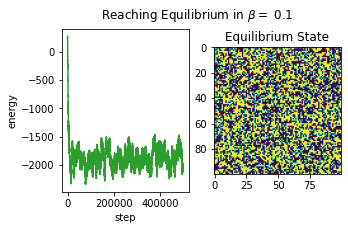

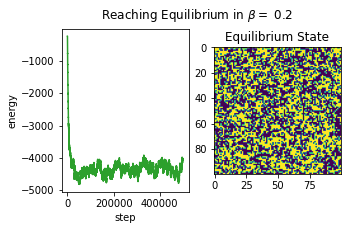

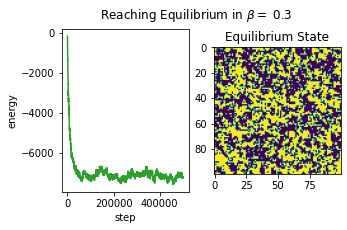

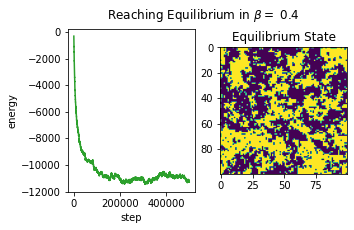

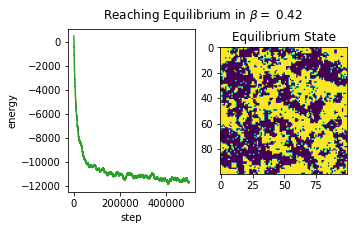

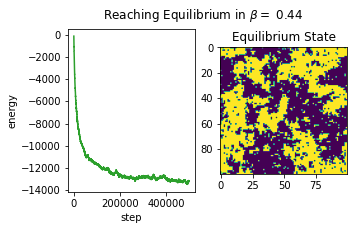

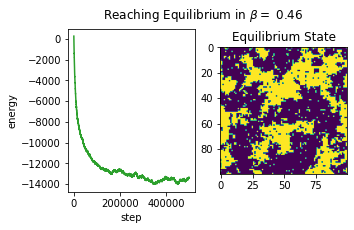

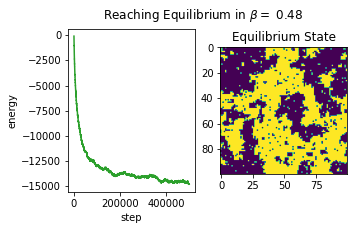

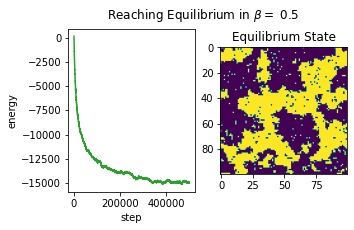

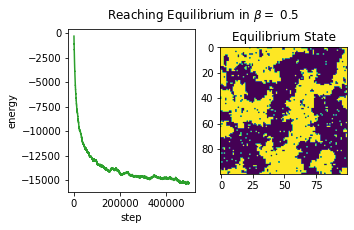

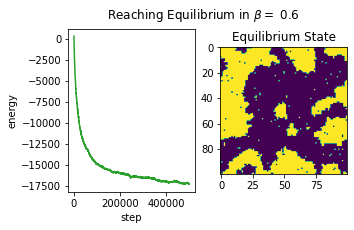

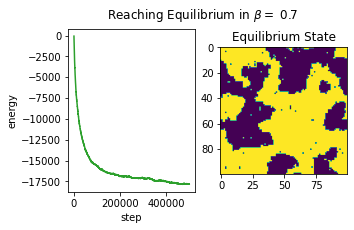

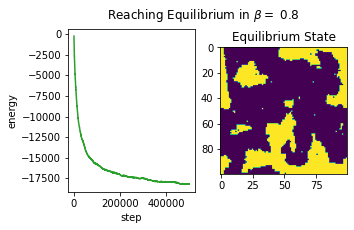

In [ ]:
%%time

# J  = 1 and beta is the control parameter
beta_mat = np.append(np.append(np.arange(0.1, 0.4, 0.1), np.arange(0.42, 0.5, 0.02)), np.arange(0.5, 0.8, 0.1))
l    = 100
n    = l * l * 200
denergy_mat  = [-8, -4, 0, 4, 8]
for beta in beta_mat: 
  boltzman_mat = [1, 1, 1, np.e ** (-beta * 4), np.e ** (-beta * 8)]

  grid = initiate(l)
  energy_tot    = np.zeros(n)

  energy_tot[0] = energy(grid)
  energy_value  = energy_tot[0]
  denergy       = 0

  for step in range(n):
    i, j = np.random.randint(0, l, 2)

    denergy = energy_variation(grid, i, j)
    if denergy <= 0:
      grid[i, j] = -grid[i, j]
      energy_value += denergy
    elif random.random() <= boltzman_mat[denergy_mat.index(denergy)]:
      grid[i, j] = -grid[i, j]
      energy_value += denergy
    energy_tot[step] = energy_value


  fig, axs = plt.subplots(1, 2, figsize=(5,3))
  fig.suptitle(f"Reaching Equilibrium in $\u03B2 = $ {np.round(beta, 2)}")
  axs[1].imshow(grid)
  axs[1].set_title('Equilibrium State')

  axs[0].plot(energy_tot, 'tab:green')
  axs[0].set(xlabel='step', ylabel='energy')

  plt.savefig(f"b{beta}.png")


Including magnetization too see evaluation till eqiulibrium:

[ -2007.4161021  -17511.23178378 -34913.52424024] 
 [  21974.29817436 1708127.96925125   34359.27473774]
CPU times: user 6min 32s, sys: 241 ms, total: 6min 32s
Wall time: 6min 33s


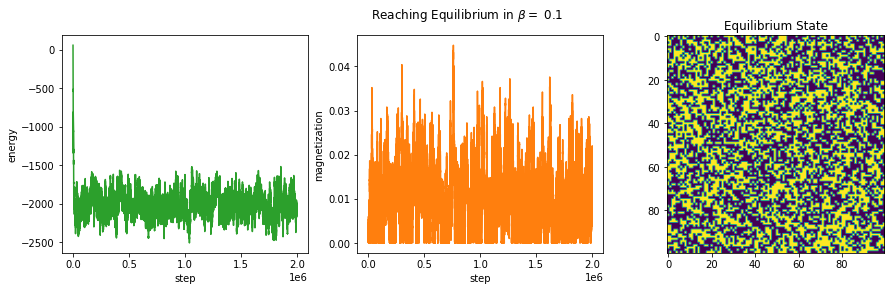

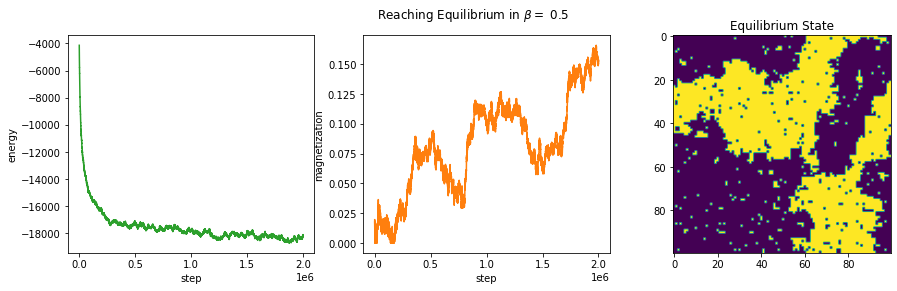

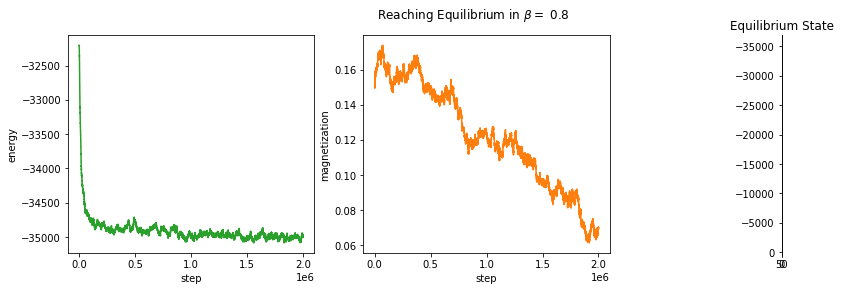

In [ ]:
%%time

# J  = 1 and beta is the control parameter

beta_mat = [0.1, 0.5, 0.8] 

l    = 100
n    = l * l * 200
grid = initiate(l)

denergy_mat  = [-8, -4, 0, 4, 8]
mean_energy  = np.zeros(np.size(beta_mat))
var_energy   = np.zeros(np.size(beta_mat))
xi = []

for beta in beta_mat: 
  boltzman_mat = [1, 1, 1, np.e ** (-beta * 4), np.e ** (-beta * 8)]

  energy_tot        = np.zeros(n)
  magnetization_tot = np.zeros(n)

  energy_tot[0]        = energy(grid)
  magnetization_tot[0] = magnetization(grid)

  energy_value        = energy_tot[0]

  denergy = 0

  for step in range(n):
    i, j = np.random.randint(0, l, 2)

    denergy = energy_variation(grid, i, j)
    if denergy <= 0:
      grid[i, j] = -grid[i, j]
      energy_value   += denergy

    elif random.random() <= boltzman_mat[denergy_mat.index(denergy)]:
      grid[i, j] = -grid[i, j]
      energy_value   += denergy

    energy_tot[step]        = energy_value
    magnetization_tot[step] = magnetization(grid)

  index = beta_mat.index(beta)
  mean_energy[index] = np.mean(energy_tot[2000:])
  var_energy[index]  = np.var(energy_tot[2000:])

  fig, axs = plt.subplots(1, 3, figsize=(15,4))
  fig.suptitle(f"Reaching Equilibrium in $\u03B2 = $ {np.round(beta, 2)}")
  axs[2].imshow(grid)
  axs[2].set_title('Equilibrium State')

  axs[0].plot(energy_tot, 'tab:green')
  axs[0].set(xlabel='step', ylabel='energy')
  # axs[0].axvline(x = xi, ymin = np.min(energy_tot), ymax = np.max(energy_tot))

  axs[1].plot(magnetization_tot, 'tab:orange')
  axs[1].set(xlabel='step', ylabel='magnetization')

print(mean_energy, '\n', var_energy)
plt.errorbar(beta_mat, mean_energy, yerr = np.sqrt(var_energy))

  # plt.savefig(f"b{beta}.png")

### Mean energy, magnetization, susceptibility and heat capacity versus $\beta$

In [ ]:
import statsmodels.api as sm

#calculate autocorrelations
def auto_corr(x):
    return sm.tsa.acf(x)

def corr_len(auto_corr, jump):
  fit = np.polyfit(np.log(np.arange(1, 9)), np.log(auto_corr[0:8]), 1)
  return (-1/fit[0] * jump)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


CPU times: user 52min 4s, sys: 1.39 s, total: 52min 5s
Wall time: 52min 7s


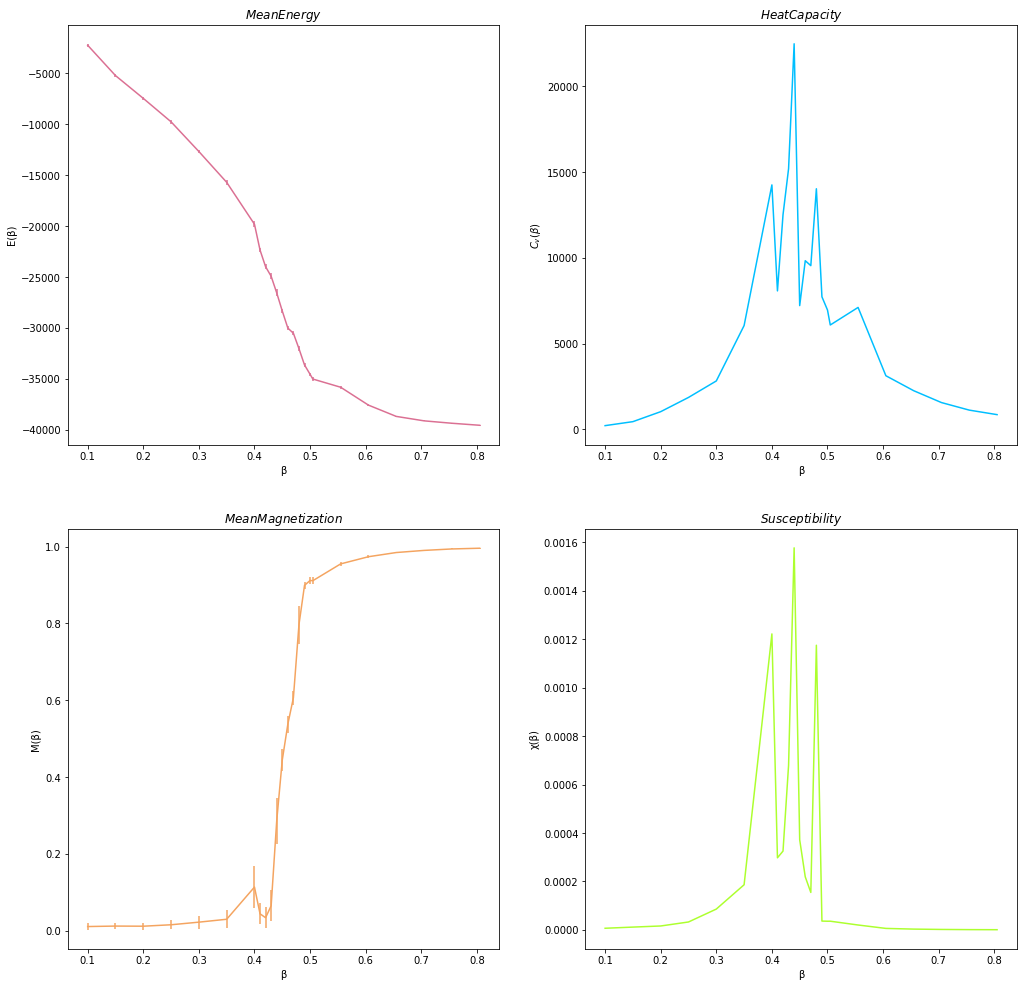

In [ ]:
%%time

# J  = 1 and beta is the control parameter

beta_mat = np.append(np.append(np.arange(0.1, 0.4, 0.05), np.arange(0.41, 0.5, 0.01)), np.arange(0.505, 0.805, 0.05))

l    = 100
n    = l * l * 200
jump = 10 * l
grid = initiate(l)

denergy_mat  = [-8, -4, 0, 4, 8]
mean_energy        = np.zeros(np.size(beta_mat))
var_energy         = np.zeros(np.size(beta_mat))
mean_magnetization = np.zeros(np.size(beta_mat))
var_magnetization  = np.zeros(np.size(beta_mat))
relaxation_time    = np.zeros(np.size(beta_mat))

for beta in beta_mat: 
  boltzman_mat = [1, 1, 1, np.e ** (-beta * 4), np.e ** (-beta * 8)]

  energy_tot        = np.zeros(n)
  magnetization_tot = np.zeros(n)
  energy_tot[0]        = energy(grid)
  magnetization_tot[0] = magnetization(grid)
  energy_value         = energy_tot[0]

  denergy = 0

  for step in range(n):
    i, j = np.random.randint(0, l, 2)

    denergy = energy_variation(grid, i, j)
    if denergy <= 0:
      grid[i, j] = -grid[i, j]
      energy_value   += denergy

    elif random.random() <= boltzman_mat[denergy_mat.index(denergy)]:
      grid[i, j] = -grid[i, j]
      energy_value   += denergy

    energy_tot[step]        = energy_value
    magnetization_tot[step] = magnetization(grid)

  index = np.where(beta_mat == beta)[0][0]
  least_step = int(l * l)

  relaxation_time[index] = int(corr_len(auto_corr(energy_tot[least_step:-1:jump]), jump))
  xi = int(relaxation_time[index])
  mean_energy[index]        = np.mean(energy_tot[least_step:-1:xi])
  var_energy[index]         = np.var(energy_tot[least_step:-1:xi])
  mean_magnetization[index] = np.mean(magnetization_tot[least_step:-1:xi])
  var_magnetization[index]  = np.var(magnetization_tot[least_step:-1:xi])

fig, axs = plt.subplots(2, 2, figsize=(17,17))
#energy
axs[0, 0].errorbar(beta_mat, mean_energy, yerr = np.sqrt(var_energy), c = 'palevioletred')
axs[0, 0].set(xlabel='\u03B2', ylabel='E(\u03B2)')
axs[0, 0].set_title('$Mean Energy$')

#heat capacity
c_v = beta_mat ** 2 * var_energy
axs[0, 1].plot(beta_mat, c_v, c = 'deepskyblue')
axs[0, 1].set(xlabel='\u03B2', ylabel='$C_v(\u03B2)$')
axs[0, 1].set_title('$Heat Capacity$')

#mean magnetization
axs[1, 0].errorbar(beta_mat, mean_magnetization, yerr = np.sqrt(var_magnetization), c = 'sandybrown')
axs[1, 0].set(xlabel='\u03B2', ylabel='M(\u03B2)')
axs[1, 0].set_title('$MeanMagnetization$')

#susceptibility
chi = beta_mat * var_magnetization
axs[1, 1].plot(beta_mat, chi, c = 'greenyellow')
axs[1, 1].set(xlabel='\u03B2', ylabel='\u03C7(\u03B2)')
axs[1, 1].set_title('$Susceptibility$')

plt.savefig(f"parameters.png")

In [ ]:
beta_mat = np.append(np.append(np.arange(0.1, 0.4, 0.05), np.arange(0.41, 0.5, 0.01)), np.arange(0.505, 0.805, 0.05))
denergy_mat  = [-8, -4, 0, 4, 8]

def parameters(l):
  n    = l * l * 150
  jump = 10 * l
  grid = initiate(l)

  beta_size = np.size(beta_mat)
  mean_energy        = np.zeros(beta_size)
  var_energy         = np.zeros(beta_size)
  mean_magnetization = np.zeros(beta_size)
  var_magnetization  = np.zeros(beta_size)
  relaxation_time    = np.zeros(beta_size)

  for beta in beta_mat: 
    boltzman_mat = [1, 1, 1, np.e ** (-beta * 4), np.e ** (-beta * 8)]

    energy_tot        = np.zeros(n)
    magnetization_tot = np.zeros(n)
    energy_tot[0]        = energy(grid)
    magnetization_tot[0] = magnetization(grid)
    energy_value         = energy_tot[0]

    denergy = 0

    for step in range(n):
      i, j = np.random.randint(0, l, 2)

      denergy = energy_variation(grid, i, j)
      if denergy <= 0:
        grid[i, j] = -grid[i, j]
        energy_value   += denergy

      elif random.random() <= boltzman_mat[denergy_mat.index(denergy)]:
        grid[i, j] = -grid[i, j]
        energy_value   += denergy

      energy_tot[step]        = energy_value
      magnetization_tot[step] = magnetization(grid)

    index = np.where(beta_mat == beta)[0][0]
    least_step = int(l * l)

    relaxation_time[index] = int(corr_len(auto_corr(energy_tot[least_step:-1:jump]), jump))
    xi = int(relaxation_time[index])
    mean_energy[index]        = np.mean(energy_tot[least_step:-1:xi])
    var_energy[index]         = np.var(energy_tot[least_step:-1:xi])
    mean_magnetization[index] = np.mean(magnetization_tot[least_step:-1:xi])
    var_magnetization[index]  = np.var(magnetization_tot[least_step:-1:xi])

  return mean_energy, var_energy, mean_magnetization, var_magnetization, relaxation_time, grid